# 4주차 Report

Convolution 신경망을 통해 전복의 Ring 수를 예측하는 모델을 만들고,

해당 모델을 전이학습을 통해 성멸을 예측하는 Pre-trained model을 만들어보자.

## 1. Data Load

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [84]:
df = pd.read_csv("C:/Project/DeepLearning/Data/abalone.csv", index_col=0) # \는 콜백문자 때문에 \\로 사용한다.
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [85]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [86]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

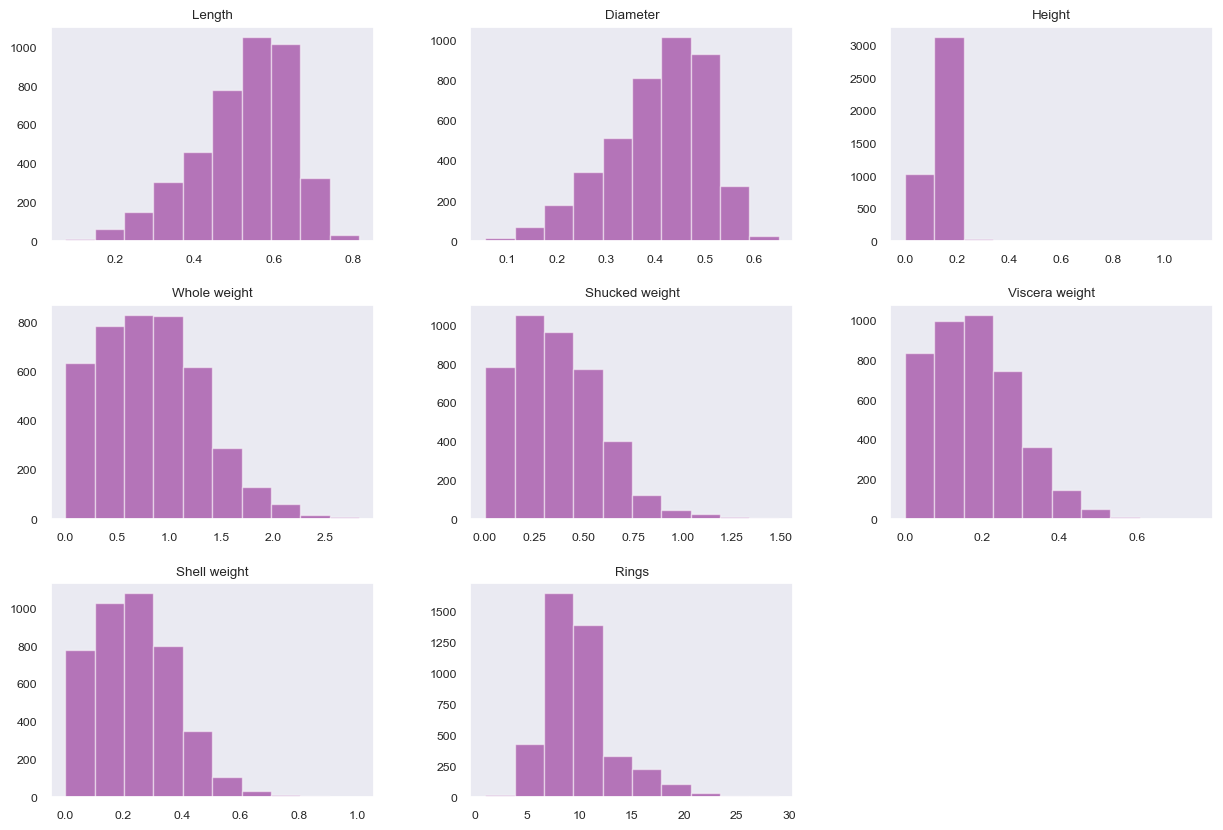

In [87]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='purple')

Text(0.5, 1.0, 'Rings of abalone')

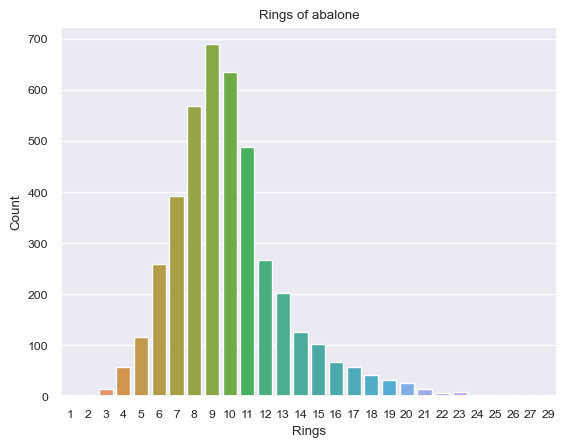

In [88]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings of abalone")

In [89]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [90]:
import pandas as pd

# 기존 abalone 데이터셋 로드
# 데이터가 abalone.csv 파일에 있다고 가정

# rings=1인 데이터와 rings=29인 데이터 추출
rings_1_data = df[df['Rings'] == 1].copy()
rings_29_data = df[df['Rings'] == 29].copy()

# rings=1인 데이터를 rings=0으로 변경
rings_1_data['Rings'] = 0

# rings=29인 데이터를 rings=28로 변경
rings_29_data['Rings'] = 28

# 기존 데이터에 rings=0과 rings=28 데이터를 추가
df = pd.concat([df, rings_1_data, rings_29_data], ignore_index=True)

# 추가된 데이터 확인
df['Rings'].value_counts()


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: Rings, dtype: int64

In [91]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12
4177,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,0


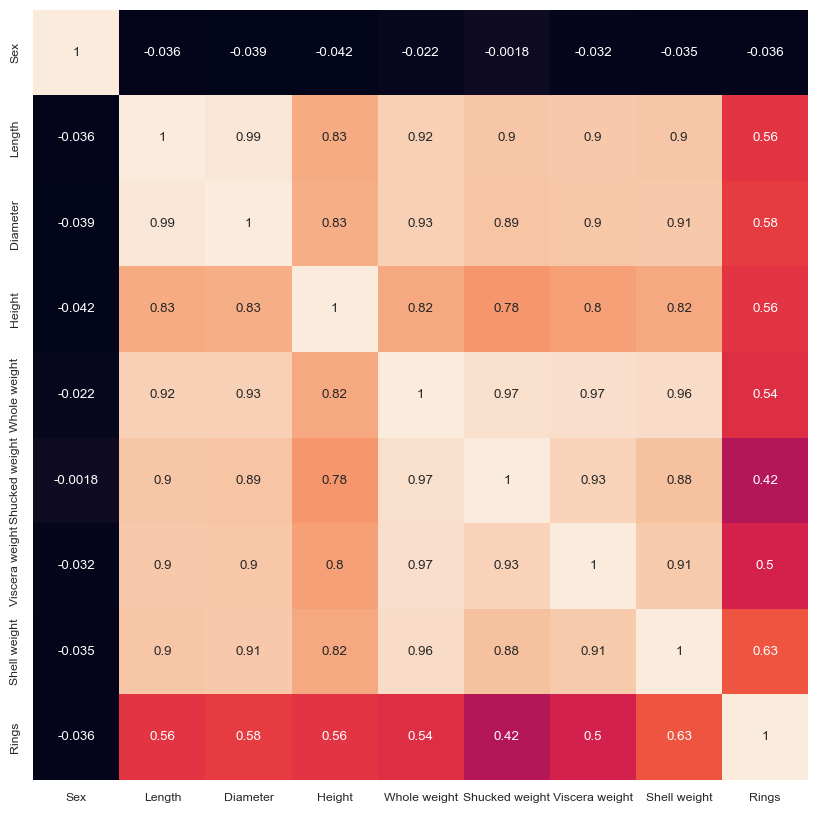

In [92]:
df_corr = df[[ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

Sex, Rings은 다른 특성들과의 상관관계가 특히 낮다. 

Abalone 데이터에 따르면, Rings 값에 1.5를 더하면 전복의 나이가 된다고 한다.

In [93]:
# Convert RingCount to Age by adding 1.5, accoring to codebook
df['Age'] = df['Rings'] + 1.5
# df.drop('Rings', axis=1, inplace=True)

## 2. Train Test Split

## Deep Learning Classification

y label
No of Classes : 0

1 -> Rings <= 8

2 -> Rings > 8 && Rings <= 11

3 -> Rings > 11

In [94]:
X_ring=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X_ring.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [125]:
new_df['newRings_1'] = np.where(df['Rings'] <= 8, 1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10, 3,0)

new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [126]:
y_ring = new_df['newRings']
y_ring.value_counts().sort_index(ascending=True)

1    1408
2    1323
3    1448
Name: newRings, dtype: int64

In [127]:
#one hot encoding 하기

y_ring = pd.get_dummies(y_ring).values
y_ring

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [128]:
from sklearn.model_selection import train_test_split

X_ring_train, X_ring_test, y_ring_train, y_ring_test = train_test_split(X_ring, y_ring, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_ring_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2788,0.615,0.460,0.150,1.0265,0.4935,0.2010,0.2745
1752,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660
2224,0.550,0.425,0.145,0.7970,0.2970,0.1500,0.2650
3389,0.565,0.465,0.150,1.1285,0.3770,0.3525,0.3300
3851,0.560,0.440,0.130,0.8255,0.2425,0.2020,0.2850
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [130]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_ring_train)
X_ring_train = pd.DataFrame(scaler.transform(X_ring_train), columns=X_ring.columns)
X_ring_test = pd.DataFrame(scaler.transform(X_ring_test), columns=X_ring.columns)

In [131]:
X_ring_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.732948,0.501811,0.221653,0.370960,0.571376,0.156254,0.229588
1,1.524491,1.512691,1.850403,2.376329,2.487103,2.442738,2.324811
2,0.191366,0.148003,0.105314,-0.094626,-0.308158,-0.304658,0.161304
3,0.316346,0.552355,0.221653,0.577887,0.049922,1.525433,0.628507
4,0.274686,0.299635,-0.243704,-0.036809,-0.552099,0.165292,0.305059
...,...,...,...,...,...,...,...
3129,1.024569,1.158883,1.036028,1.579051,1.336771,1.254309,1.685103
3130,1.066229,0.906163,-0.011025,0.663093,0.781748,1.209121,0.305059
3131,0.566307,0.400723,0.105314,0.234023,0.434858,0.205960,0.078645
3132,0.816268,0.805075,0.570671,0.574844,0.497522,0.477085,0.545848


In [132]:
y_ring_test

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [133]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :7], sequences[end_ix-1, 7:]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [134]:
# Merge train and test X/y data to apply sequence transformation function
y_ring_train_array = np.array(y_ring_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
ring_train_set = np.c_[X_ring_train, y_ring_train_array]

y_ring_test_array = np.array(y_ring_test)
ring_test_set = np.c_[X_ring_test, y_ring_test_array]

# 7개의 features와 3개의 label이 합쳐진 train_set, test_set
print(ring_test_set)

[[ 1.19120934  1.05779512  0.68701044 ...  0.          0.
   1.        ]
 [ 1.27452966  1.51269105  1.26870674 ...  0.          0.
   1.        ]
 [-1.51670092 -1.57049248 -1.05807848 ...  1.          0.
   0.        ]
 ...
 [ 0.27468587  0.35017923  0.91968896 ...  0.          1.
   0.        ]
 [-1.60002124 -1.62103647 -1.17441775 ...  1.          0.
   0.        ]
 [ 0.4413265   0.50181121 -0.01102513 ...  0.          1.
   0.        ]]


In [135]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_ring_train, y_ring_train = split_sequences(ring_train_set, 5)
print(X_ring_train.shape, y_ring_train.shape)

X_ring_test, y_ring_test = split_sequences(ring_test_set, 5)
print(X_ring_test.shape, y_ring_test.shape)   

(3130, 5, 7) (3130, 3)
(1041, 5, 7) (1041, 3)


In [136]:
# 각각 스텝 수, feature 수, label 수
n_timesteps, n_features, n_outputs = X_ring_train.shape[1], X_ring_train.shape[2], y_ring_train.shape[1]
print(n_timesteps, n_features, n_outputs)

5 7 3


## 3. Make Dense Layer

In [137]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv1D
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

In [146]:
# Define the model architecture
inputs = Input(shape=(n_timesteps, n_features,))

x = Conv1D(64, 2, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(3, activation='softmax')(x)  # 클래스 수에 맞춰 수정

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model with categorical_crossentropy
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 5, 7)]            0         
                                                                 
 conv1d_27 (Conv1D)          (None, 4, 64)             960       
                                                                 
 dense_44 (Dense)            (None, 4, 128)            8320      
                                                                 
 dropout_23 (Dropout)        (None, 4, 128)            0         
                                                                 
 dense_45 (Dense)            (None, 4, 128)            16512     
                                                                 
 flatten_19 (Flatten)        (None, 512)               0         
                                                                 
 dense_46 (Dense)            (None, 3)                 153

In [147]:
model_history=model.fit(x=X_ring_train, y=y_ring_train, epochs=50, batch_size=32, validation_split = 0.1, shuffle = True)
pred_DL = model.predict(X_ring_test)

y_test_class = np.argmax(y_ring_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(pred_DL,axis=1)

Epoch 1/50
89/89 [==============================] - 1s 4ms/step - loss: 0.9126 - accuracy: 0.5307 - val_loss: 0.8474 - val_accuracy: 0.5559
Epoch 2/50
89/89 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.5811 - val_loss: 0.8164 - val_accuracy: 0.5719
Epoch 3/50
89/89 [==============================] - 0s 2ms/step - loss: 0.8140 - accuracy: 0.6180 - val_loss: 0.7949 - val_accuracy: 0.5879
Epoch 4/50
89/89 [==============================] - 0s 2ms/step - loss: 0.7865 - accuracy: 0.6152 - val_loss: 0.7629 - val_accuracy: 0.6038
Epoch 5/50
89/89 [==============================] - 0s 2ms/step - loss: 0.7623 - accuracy: 0.6372 - val_loss: 0.7530 - val_accuracy: 0.6422
Epoch 6/50
89/89 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.6425 - val_loss: 0.7425 - val_accuracy: 0.6486
Epoch 7/50
89/89 [==============================] - 0s 2ms/step - loss: 0.7523 - accuracy: 0.6535 - val_loss: 0.7470 - val_accuracy: 0.6422
Epoch 8/50
89/89 [==

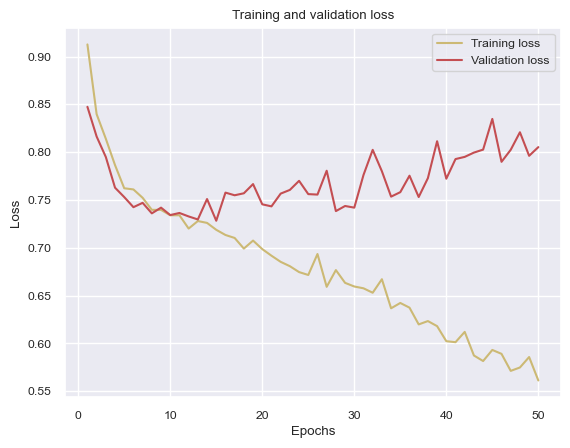

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

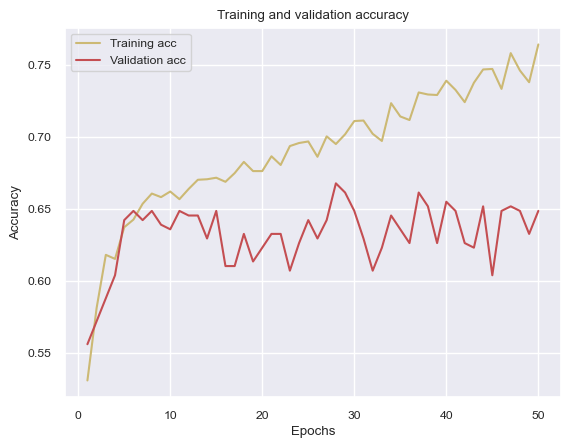

In [149]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       387
           1       0.45      0.44      0.45       297
           2       0.65      0.68      0.67       357

    accuracy                           0.63      1041
   macro avg       0.62      0.62      0.62      1041
weighted avg       0.63      0.63      0.63      1041

[[287  77  23]
 [ 61 131 105]
 [ 32  82 243]]


---

## 4. Make Pre-trained model

In [151]:
base_loss,base_accuracy=model.evaluate(X_ring_test, y_ring_test)

model_file='C:/Project/DeepLearning/Data/Abalone_model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 [==============================] - 0s 887us/step - loss: 0.8190 - accuracy: 0.6350
model saved at  C:/Project/DeepLearning/Data/Abalone_model.h5
Accuracy >63.496637
Base Loss >0.82


C:\Users\Choij\AppData\Local\Temp\ipykernel_21408\485659847.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, model_file, include_optimizer=False)


In [152]:
# Base 모델을 로드 (RA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [153]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  7


---

# Pre-trained model 
## abalone sex classification

만들어진 Pre-trained model로 이번에는 abalone의 성별을 예측하는 모델로 전이학습을 진행해보자.

## 1. Data Load

In [154]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,13.5
4177,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,0,1.5


In [155]:
X_sex=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X_sex.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [156]:
y_sex = df['Sex']
y_sex.value_counts().sort_index(ascending=True)

0    1308
1    1343
2    1528
Name: Sex, dtype: int64

In [157]:
#one hot encoding 하기

y_sex = pd.get_dummies(y_sex).values
y_sex

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

## 2. Train Test Split 

In [158]:
from sklearn.model_selection import train_test_split

X_sex_train, X_sex_test, y_sex_train, y_sex_test = train_test_split(X_sex, y_sex, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_sex_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2788,0.615,0.460,0.150,1.0265,0.4935,0.2010,0.2745
1752,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660
2224,0.550,0.425,0.145,0.7970,0.2970,0.1500,0.2650
3389,0.565,0.465,0.150,1.1285,0.3770,0.3525,0.3300
3851,0.560,0.440,0.130,0.8255,0.2425,0.2020,0.2850
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [162]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_sex_train)
X_sex_train = pd.DataFrame(scaler.transform(X_sex_train), columns=X_sex.columns)
X_sex_test = pd.DataFrame(scaler.transform(X_sex_test), columns=X_sex.columns)

In [163]:
X_sex_test.shape[1]

7

In [164]:
y_sex_test.shape[1]

3

In [169]:
# Merge train and test X/y data to apply sequence transformation function
y_sex_train_array = np.array(y_sex_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
sex_train_set = np.c_[X_sex_train, y_sex_train_array]

y_sex_test_array = np.array(y_sex_test)
sex_test_set = np.c_[X_sex_test, y_sex_test_array]

# 7개의 features와 3개의 label이 합쳐진 train_set, test_set
print(sex_test_set)

[[ 1.19120934  1.05779512  0.68701044 ...  1.          0.
   0.        ]
 [ 1.27452966  1.51269105  1.26870674 ...  1.          0.
   0.        ]
 [-1.51670092 -1.57049248 -1.05807848 ...  0.          1.
   0.        ]
 ...
 [ 0.27468587  0.35017923  0.91968896 ...  1.          0.
   0.        ]
 [-1.60002124 -1.62103647 -1.17441775 ...  0.          0.
   1.        ]
 [ 0.4413265   0.50181121 -0.01102513 ...  0.          1.
   0.        ]]


In [170]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_sex_train, y_sex_train = split_sequences(sex_train_set, 5)
print(X_sex_train.shape, y_sex_train.shape)

X_sex_test, y_sex_test = split_sequences(sex_test_set, 5)
print(X_sex_test.shape, y_sex_test.shape)   

(3130, 5, 7) (3130, 3)
(1041, 5, 7) (1041, 3)


## 3. Make Dense Layer

In [165]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [171]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# LA모델의 출력층부터 1개의 레이어를 삭제 -> 출력층을 RA에 맞게 변경한다 (전이학습)
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(y_sex_test.shape[1], activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 4, 64)             960       
                                                                 
 dense_44 (Dense)            (None, 4, 128)            8320      
                                                                 
 dropout_23 (Dropout)        (None, 4, 128)            0         
                                                                 
 dense_45 (Dense)            (None, 4, 128)            16512     
                                                                 
 flatten_19 (Flatten)        (None, 512)               0         
                                                                 
 dense_50 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 27331 (106.76 KB)
Trainable params: 1539

In [172]:
model_history=model.fit(x=X_sex_train, y=y_sex_train, epochs=50, batch_size=32, validation_split = 0.1, shuffle = True)
pred_DL = model.predict(X_sex_test)

y_test_class = np.argmax(y_sex_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(pred_DL,axis=1)

Epoch 1/50
89/89 [==============================] - 0s 2ms/step - loss: 1.1823 - accuracy: 0.4306 - val_loss: 0.9270 - val_accuracy: 0.4952
Epoch 2/50
89/89 [==============================] - 0s 2ms/step - loss: 0.9227 - accuracy: 0.5218 - val_loss: 0.8932 - val_accuracy: 0.5208
Epoch 3/50
89/89 [==============================] - 0s 2ms/step - loss: 0.8914 - accuracy: 0.5456 - val_loss: 0.8714 - val_accuracy: 0.5527
Epoch 4/50
89/89 [==============================] - 0s 2ms/step - loss: 0.8784 - accuracy: 0.5502 - val_loss: 0.8678 - val_accuracy: 0.5431
Epoch 5/50
89/89 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.5548 - val_loss: 0.8689 - val_accuracy: 0.5335
Epoch 6/50
89/89 [==============================] - 0s 2ms/step - loss: 0.8555 - accuracy: 0.5754 - val_loss: 0.8611 - val_accuracy: 0.5272
Epoch 7/50
89/89 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.5651 - val_loss: 0.8587 - val_accuracy: 0.5304
Epoch 8/50
89/89 [==

---

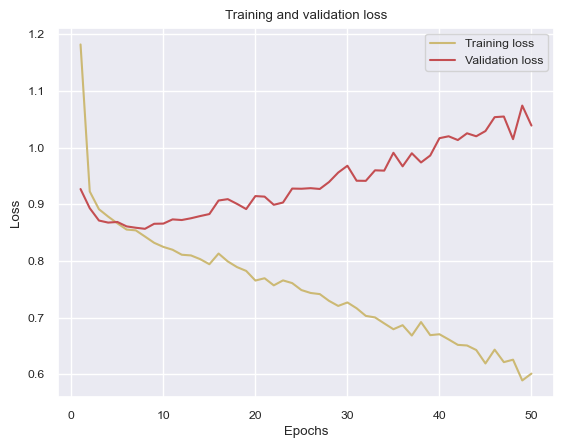

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

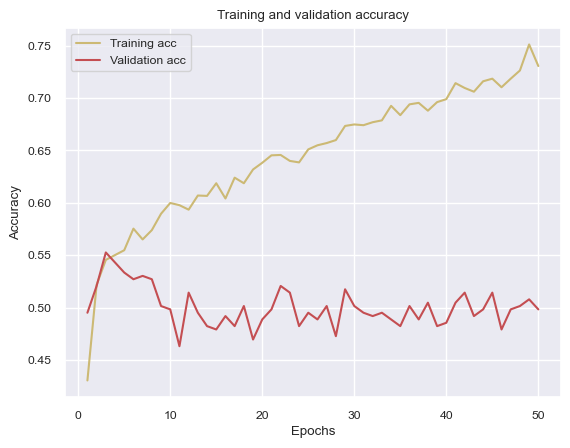

In [174]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.41      0.36      0.38       322
           1       0.68      0.75      0.71       366
           2       0.44      0.44      0.44       353

    accuracy                           0.52      1041
   macro avg       0.51      0.52      0.51      1041
weighted avg       0.51      0.52      0.52      1041

[[115  58 149]
 [ 40 275  51]
 [125  73 155]]


## 4. Evaluate the model

In [177]:
model.evaluate(X_sex_train, y_sex_train)

98/98 [==============================] - 0s 836us/step - loss: 0.5511 - accuracy: 0.7824


[0.5510969161987305, 0.7824280858039856]

ring 예측과 마찬가지로 모델의 정확도가 높지 않게 나온다..

한번 전이학습된 모델로 ring을 예측시켜보자.

In [178]:
model.evaluate(X_ring_train, y_ring_train)

98/98 [==============================] - 0s 820us/step - loss: 2.2130 - accuracy: 0.2843


[2.212989568710327, 0.2843450605869293]